# Surface concentrations

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from datetime import date

%matplotlib inline

###### Parameters:

In [22]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# model results:
year = 2015
# results_folder1 = '/data/brogalla/run_storage/Mn-set4-202004/ref-'+str(year)+'/'
# results_folder1 = '/data/brogalla/run_storage/Mn-reference-202102/ref-'+str(year)+'-202102/'
results_folder1 = f'/data/brogalla/run_storage/Mn-reference-202103/ref-{year}-202103/'

In [3]:
stn_i = np.array([104-1, 100, 91, 175, 175, 233, 214, 352, 242, 458, 508, 547, 629])
stn_j = np.array([370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457, 471])
stn_n = np.array(['CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7',
                  'CAA8','CAA9', 'CB1','CB2','CB3','CB4'])

###### Load files:

In [4]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [23]:
ref   = nc.Dataset(f'{results_folder1}ANHA12_EXH006_{year}_monthly.nc',  'r')
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

In [24]:
results1  = nc.Dataset(f'{results_folder1}ANHA12_EXH006_{year}_monthly.nc')
dissolmn1 = np.array(results1.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn1 = np.array(results1.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

##### Functions:

In [34]:
def plot_layer(month, layer, variable, vmin=0,vmax=35, savefig=False):
    
#     plot_var = np.mean(variable[month,1:17,:,:], axis=0)
    plot_var = variable[month,layer,:,:]
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

    x, y = proj1(lons, lats)

    contour = proj1.contourf(x, y, plot_var, np.arange(vmin,vmax+2.5,2.5),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

    cbar_ax = fig.add_axes([0.72, 0.14, 0.04, 0.6])
    cbar    = fig.colorbar(contour, cax=cbar_ax, ticks=np.arange(0,35,5))#[0,2,4,6,8,10,12])
    cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
    cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
    figure = plt.gcf()
    figure.set_size_inches(4.5*1.8, 3.7)
    
#     ax1.plot(x[i+di,j+dj], y[i+di,j+dj], '.r', markersize=10, zorder=5)
#     ax1.plot(x[i-di,j-dj], y[i-di,j-dj], '.r', markersize=10, zorder=5)
#     ax1.plot(x[i+di,j-dj], y[i+di,j-dj], '.r', markersize=10, zorder=5)
#     ax1.plot(x[i-di,j+dj], y[i-di,j+dj], '.r', markersize=10, zorder=5)
    
    if savefig:
#         fig.savefig('/ocean/brogalla/GEOTRACES/figures/R5-surface-field-'+\
#                     str(date.today().strftime('%Y%m%d'))+'.png', bbox_inches='tight', dpi=300)
        figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A10-profile-area-map-July.png', \
                       bbox_inches='tight', dpi=300)
        figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A10-profile-area-map-July.svg', \
                       bbox_inches='tight', dpi=300, format='svg')
    
    return

In [9]:
def load_results(folder_ref):
    
    months  = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    dmn_riv = np.empty((12,1,isize,jsize))   ; dmn_sed = np.empty((12,1,isize,jsize)); 
    dmn_atm = np.empty((12,1,isize,jsize))   ; dmn_ice = np.empty((12,1,isize,jsize));
    dmn_sedice = np.empty((12,1,isize,jsize));
    dmn_red = np.empty((12,50,isize,jsize)); dmn_oxi = np.empty((12,50,isize,jsize))
    
    i=0
    for month in months:
        file        = 'ANHA12_EXH006_1m_'+str(year)+'0101_'+str(year)+'1231_comp_'+str(year)+month+'-'+str(year)+month+'.nc'
        ref_monthly = nc.Dataset(folder_ref+file)
        
        dmn_riv[i,0,:,:]    = np.array(ref_monthly.variables['dmnriv'])[0,:,:]*(10**9)*(3600*24*31)
        dmn_sed[i,0,:,:]    = np.array(ref_monthly.variables['dmnsed'])[0,:,:]*(10**9)*(3600*24*31)
        dmn_sedice[i,0,:,:] = np.array(ref_monthly.variables['dmnsedice'])[0,:,:]*(10**9)*(3600*24*31)
        dmn_atm[i,0,:,:]    = np.array(ref_monthly.variables['dmnatm'])[0,:,:]*(10**9)*(3600*24*31)
        dmn_ice[i,0,:,:]    = np.array(ref_monthly.variables['dmnice'])[0,:,:]*(10**9)*(3600*24*31)
        dmn_red[i,:,:,:]  = np.array(ref_monthly.variables['dmnred'])[0,:,:,:]*(10**9)*(3600*24*31)
        dmn_oxi[i,:,:,:]  = np.array(ref_monthly.variables['dmnoxi'])[0,:,:,:]*(10**9)*(3600*24*31)
        i+=1
    
    tmask_surf    = np.empty(dmn_riv.shape)
    tmask_surf[:] = tmask[0,:,:]
    tmask_full    = np.empty(dmn_red.shape)
    tmask_full[:] = tmask
    
    # Mask points on land:
    dmn_mriv    = np.ma.masked_where((tmask_surf < 0.1), dmn_riv); 
    dmn_msed    = np.ma.masked_where((tmask_surf < 0.1), dmn_sed)
    dmn_msedice = np.ma.masked_where((tmask_surf < 0.1), dmn_sedice)
    dmn_matm    = np.ma.masked_where((tmask_surf < 0.1), dmn_atm)
    dmn_mice    = np.ma.masked_where((tmask_surf < 0.1), dmn_ice)
    dmn_mred    = np.ma.masked_where((tmask_full < 0.1), dmn_red)
    dmn_moxi    = np.ma.masked_where((tmask_full < 0.1), dmn_oxi)

    return dmn_mriv, dmn_msed, dmn_msedice, dmn_matm, dmn_mice, dmn_mred , dmn_moxi

##### Figures of surface concentrations:

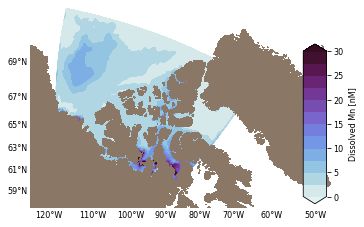

In [33]:
plot_layer(0,0,dissolmn1,vmin=0,vmax=30, savefig=False)

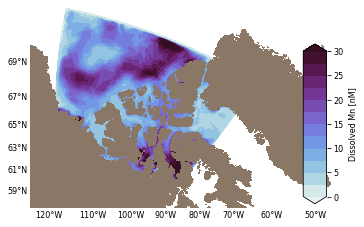

In [35]:
plot_layer(6,0,dissolmn1,vmin=0,vmax=30, savefig=True)

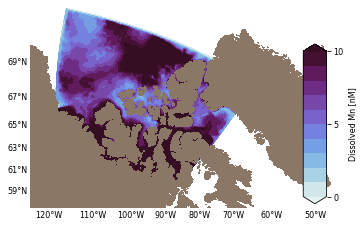

In [29]:
plot_layer(7,0,dissolmn1,vmin=0,vmax=10, savefig=False)

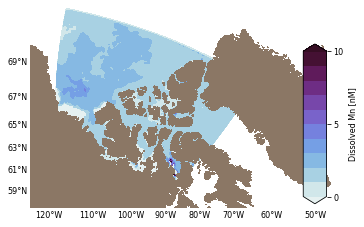

In [16]:
plot_layer(0,20,dissolmn1,vmin=0,vmax=10, savefig=False)

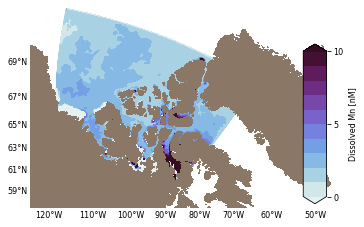

In [31]:
plot_layer(0,20,dissolmn1,vmin=0,vmax=10, savefig=False)

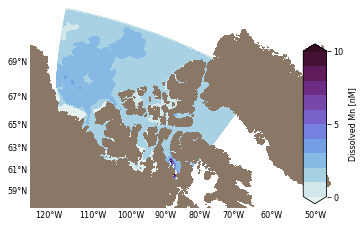

In [17]:
plot_layer(7,20,dissolmn1,vmin=0,vmax=10, savefig=False)

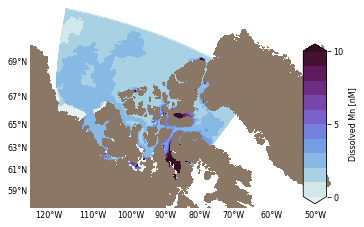

In [30]:
plot_layer(7,20,dissolmn1,vmin=0,vmax=10, savefig=False)

Canada Basin surface profile

In [36]:
month=6
i  = 608
j  = 418
di = 30
dj = 30

dmn = dissolmn1[month,:,i-di:i+di,j-dj:j+dj].mean(axis=(1,2))

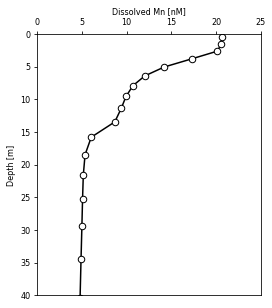

In [38]:
fig, ax = plt.subplots(1,1, figsize=(4,6))

ax.invert_yaxis()
ax.plot(dmn, depth, '-k')
ax.plot(dmn, depth, '.w', markersize=13, markeredgecolor='k')

ax.set_xlabel('Dissolved Mn [nM]', fontsize=8)
ax.set_ylabel('Depth [m]', fontsize=8)
ax.set_xlim(0,25)
ax.set_ylim(40,0)
ax.tick_params(axis='both', labelsize=8)
ax.xaxis.tick_top()    
ax.xaxis.set_label_position('top') 

figure = plt.gcf()
figure.set_size_inches(4.0, 3.7*1.3)
    
figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A10-profile.png', \
               bbox_inches='tight', dpi=300)
figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A10-profile.svg', \
               bbox_inches='tight', dpi=300, format='svg')